In [367]:
library(tm)
library(wordcloud)
library(RColorBrewer)

library(rvest)


In [368]:
getSources()


[1] "DataframeSource" "DirSource"       "URISource"       "VectorSource"   
[5] "XMLSource"       "ZipSource"

In [369]:
getReaders()


[1] "readDataframe"           "readDOC"                
 [3] "readPDF"                 "readPlain"              
 [5] "readRCV1"                "readRCV1asPlain"        
 [7] "readReut21578XML"        "readReut21578XMLasPlain"
 [9] "readTagged"              "readXML"

In [370]:
x <- read_html("https://en.wikipedia.org/wiki/Artificial_intelligence", options = c("NOBLANKS", "NSCLEAN"))

x <- x %>%
    html_element("#bodyContent") %>%
    html_elements("div > *") %>%
    html_text2()

corpus <- VCorpus(VectorSource(x), readerControl = list(reader = readPlain, language = "eng"))

inspect(corpus)


<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 592

[[1]]
<<PlainTextDocument>>
Metadata:  7
Content:  chars: 0

[[2]]
<<PlainTextDocument>>
Metadata:  7
Content:  chars: 0

[[3]]
<<PlainTextDocument>>
Metadata:  7
Content:  chars: 0

[[4]]
<<PlainTextDocument>>
Metadata:  7
Content:  chars: 0

[[5]]
<<PlainTextDocument>>
Metadata:  7
Content:  chars: 37

[[6]]
<<PlainTextDocument>>
Metadata:  7
Content:  chars: 0

[[7]]
<<PlainTextDocument>>
Metadata:  7
Content:  chars: 186582

[[8]]
<<PlainTextDocument>>
Metadata:  7
Content:  chars: 24

[[9]]
<<PlainTextDocument>>
Metadata:  7
Content:  chars: 220

[[10]]
<<PlainTextDocument>>
Metadata:  7
Content:  chars: 126

[[11]]
<<PlainTextDocument>>
Metadata:  7
Content:  chars: 19

[[12]]
<<PlainTextDocument>>
Metadata:  7
Content:  chars: 40

[[13]]
<<PlainTextDocument>>
Metadata:  7
Content:  chars: 17

[[14]]
<<PlainTextDocument>>
Metadata:  7
Content:  chars: 0

[[15]]
<<PlainTextDocument>>
M

In [371]:
meta(corpus[[2]])


  author       : character(0)
  datetimestamp: 2024-06-28 19:31:36.6969270706177
  description  : character(0)
  heading      : character(0)
  id           : 2
  language     : eng
  origin       : character(0)

In [372]:
as.character(corpus[[2]])


[1] ""

In [373]:
stopwords("portuguese")


[1] "de"           "a"            "o"            "que"          "e"           
  [6] "do"           "da"           "em"           "um"           "para"        
 [11] "com"          "não"          "uma"          "os"           "no"          
 [16] "se"           "na"           "por"          "mais"         "as"          
 [21] "dos"          "como"         "mas"          "ao"           "ele"         
 [26] "das"          "à"            "seu"          "sua"          "ou"          
 [31] "quando"       "muito"        "nos"          "já"           "eu"          
 [36] "também"       "só"           "pelo"         "pela"         "até"         
 [41] "isso"         "ela"          "entre"        "depois"       "sem"         
 [46] "mesmo"        "aos"          "seus"         "quem"         "nas"         
 [51] "me"           "esse"         "eles"         "você"         "essa"        
 [56] "num"          "nem"          "suas"         "meu"          "às"          
 [61] "minha"        "numa"         "pelos"        "elas"         "qual"        
 [66] "nós"          "lhe"          "deles"        "essas"        "esses"       
 [71] "pelas"        "este"         "dele"         "tu"           "te"          
 [76] "vocês"        "vos"          "lhes"         "meus"         "minhas"      
 [81] "teu"          "tua"          "teus"         "tuas"         "nosso"       
 [86] "nossa"        "nossos"       "nossas"       "dela"         "delas"       
 [91] "esta"         "estes"        "estas"        "aquele"       "aquela"      
 [96] "aqueles"      "aquelas"      "isto"         "aquilo"       "estou"       
[101] "está"         "estamos"      "estão"        "estive"       "esteve"      
[106] "estivemos"    "estiveram"    "estava"       "estávamos"    "estavam"     
[111] "estivera"     "estivéramos"  "esteja"       "estejamos"    "estejam"     
[116] "estivesse"    "estivéssemos" "estivessem"   "estiver"      "estivermos"  
[121] "estiverem"    "hei"          "há"           "havemos"      "hão"         
[126] "houve"        "houvemos"     "houveram"     "houvera"      "houvéramos"  
[131] "haja"         "hajamos"      "hajam"        "houvesse"     "houvéssemos" 
[136] "houvessem"    "houver"       "houvermos"    "houverem"     "houverei"    
[141] "houverá"      "houveremos"   "houverão"     "houveria"     "houveríamos" 
[146] "houveriam"    "sou"          "somos"        "são"          "era"         
[151] "éramos"       "eram"         "fui"          "foi"          "fomos"       
[156] "foram"        "fora"         "fôramos"      "seja"         "sejamos"     
[161] "sejam"        "fosse"        "fôssemos"     "fossem"       "for"         
[166] "formos"       "forem"        "serei"        "será"         "seremos"     
[171] "serão"        "seria"        "seríamos"     "seriam"       "tenho"       
[176] "tem"          "temos"        "tém"          "tinha"        "tínhamos"    
[181] "tinham"       "tive"         "teve"         "tivemos"      "tiveram"     
[186] "tivera"       "tivéramos"    "tenha"        "tenhamos"     "tenham"      
[191] "tivesse"      "tivéssemos"   "tivessem"     "tiver"        "tivermos"    
[196] "tiverem"      "terei"        "terá"         "teremos"      "terão"       
[201] "teria"        "teríamos"     "teriam"

In [374]:
stopwords("english")


[1] "i"          "me"         "my"         "myself"     "we"        
  [6] "our"        "ours"       "ourselves"  "you"        "your"      
 [11] "yours"      "yourself"   "yourselves" "he"         "him"       
 [16] "his"        "himself"    "she"        "her"        "hers"      
 [21] "herself"    "it"         "its"        "itself"     "they"      
 [26] "them"       "their"      "theirs"     "themselves" "what"      
 [31] "which"      "who"        "whom"       "this"       "that"      
 [36] "these"      "those"      "am"         "is"         "are"       
 [41] "was"        "were"       "be"         "been"       "being"     
 [46] "have"       "has"        "had"        "having"     "do"        
 [51] "does"       "did"        "doing"      "would"      "should"    
 [56] "could"      "ought"      "i'm"        "you're"     "he's"      
 [61] "she's"      "it's"       "we're"      "they're"    "i've"      
 [66] "you've"     "we've"      "they've"    "i'd"        "you'd"     
 [71] "he'd"       "she'd"      "we'd"       "they'd"     "i'll"      
 [76] "you'll"     "he'll"      "she'll"     "we'll"      "they'll"   
 [81] "isn't"      "aren't"     "wasn't"     "weren't"    "hasn't"    
 [86] "haven't"    "hadn't"     "doesn't"    "don't"      "didn't"    
 [91] "won't"      "wouldn't"   "shan't"     "shouldn't"  "can't"     
 [96] "cannot"     "couldn't"   "mustn't"    "let's"      "that's"    
[101] "who's"      "what's"     "here's"     "there's"    "when's"    
[106] "where's"    "why's"      "how's"      "a"          "an"        
[111] "the"        "and"        "but"        "if"         "or"        
[116] "because"    "as"         "until"      "while"      "of"        
[121] "at"         "by"         "for"        "with"       "about"     
[126] "against"    "between"    "into"       "through"    "during"    
[131] "before"     "after"      "above"      "below"      "to"        
[136] "from"       "up"         "down"       "in"         "out"       
[141] "on"         "off"        "over"       "under"      "again"     
[146] "further"    "then"       "once"       "here"       "there"     
[151] "when"       "where"      "why"        "how"        "all"       
[156] "any"        "both"       "each"       "few"        "more"      
[161] "most"       "other"      "some"       "such"       "no"        
[166] "nor"        "not"        "only"       "own"        "same"      
[171] "so"         "than"       "too"        "very"

In [375]:
corpus <- tm_map(corpus, removeWords, stopwords("english"))


In [376]:
inspect(corpus[[2]])


<<PlainTextDocument>>
Metadata:  7
Content:  chars: 0




In [377]:
corpus <- tm_map(corpus, stripWhitespace)


In [378]:
inspect(corpus[[2]])


<<PlainTextDocument>>
Metadata:  7
Content:  chars: 0




In [379]:
corpus <- tm_map(corpus, removePunctuation)


In [380]:
inspect(corpus[[2]])


<<PlainTextDocument>>
Metadata:  7
Content:  chars: 0




In [381]:
corpus <- tm_map(corpus, removeNumbers)


In [382]:
inspect(corpus[[2]])


<<PlainTextDocument>>
Metadata:  7
Content:  chars: 0




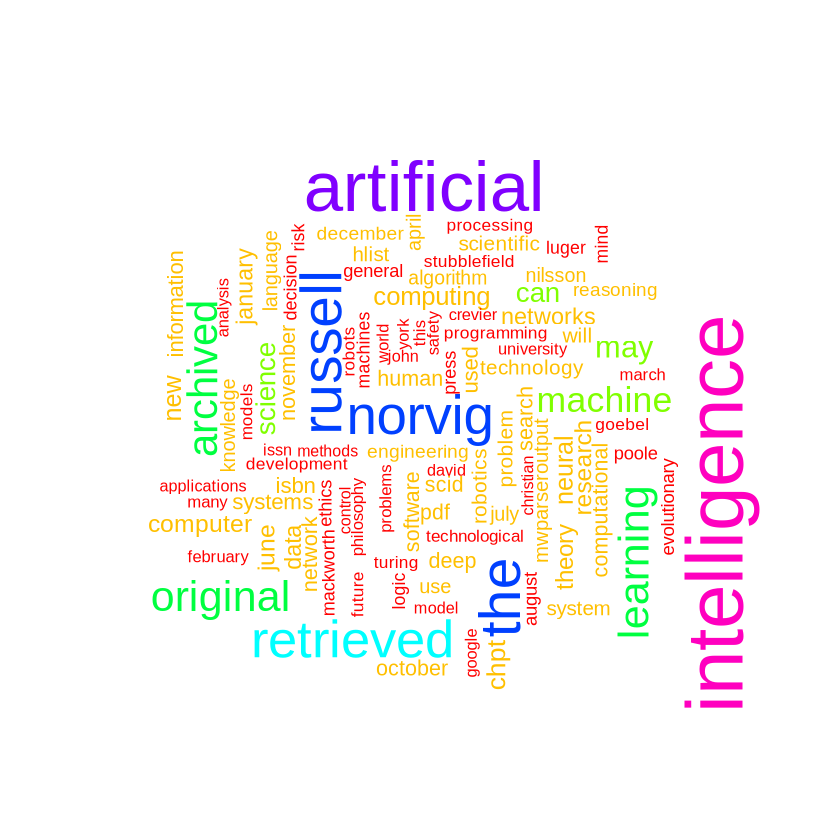

In [383]:
wordcloud(corpus, max.words = 100, random.order = TRUE, colors = rainbow(8), rot.per = 0.5, use.r.layout = TRUE)


In [384]:
freq <- TermDocumentMatrix(corpus)

freq


<<TermDocumentMatrix (terms: 5165, documents: 592)>>
Non-/sparse entries: 25622/3032058
Sparsity           : 99%
Maximal term length: 109
Weighting          : term frequency (tf)

In [385]:
matriz <- as.matrix(freq)

matriz <- sort(rowSums(matriz), decreasing = TRUE)

matriz <- data.frame(word = names(matriz), freq = matriz)

head(matriz, 10)


,word,freq
,<chr>,<dbl>
intelligence,intelligence,673
artificial,artificial,585
the,the,450
russell,russell,449
norvig,norvig,430
retrieved,retrieved,409
learning,learning,318
original,original,316
archived,archived,306


In [386]:
findFreqTerms(freq, lowfreq = 10)

[1] "ability"                            
  [2] "able"                               
  [3] "about"                              
  [4] "academic"                           
  [5] "accurate"                           
  [6] "acm"                                
  [7] "action"                             
  [8] "actions"                            
  [9] "actors"                             
 [10] "actually"                           
 [11] "adaptation"                         
 [12] "advanced"                           
 [13] "adversarial"                        
 [14] "affective"                          
 [15] "agent"                              
 [16] "agents"                             
 [17] "agi"                                
 [18] "agree"                              
 [19] "ais"                                
 [20] "alan"                               
 [21] "alex"                               
 [22] "alexander"                          
 [23] "alexey"                             
 [24] "alfred"                             
 [25] "algorithm"                          
 [26] "algorithmic"                        
 [27] "algorithms"                         
 [28] "alignment"                          
 [29] "allows"                             
 [30] "alphafold"                          
 [31] "alphago"                            
 [32] "already"                            
 [33] "also"                               
 [34] "although"                           
 [35] "altman"                             
 [36] "amazon"                             
 [37] "american"                           
 [38] "americans"                          
 [39] "among"                              
 [40] "amounts"                            
 [41] "analysis"                           
 [42] "analyze"                            
 [43] "and"                                
 [44] "anderson"                           
 [45] "andrew"                             
 [46] "another"                            
 [47] "ant"                                
 [48] "anthony"                            
 [49] "anything"                           
 [50] "application"                        
 [51] "applications"                       
 [52] "applied"                            
 [53] "approach"                           
 [54] "approaches"                         
 [55] "approximation"                      
 [56] "april"                              
 [57] "archaeology"                        
 [58] "architecture"                       
 [59] "archived"                           
 [60] "area"                               
 [61] "areas"                              
 [62] "argued"                             
 [63] "argues"                             
 [64] "around"                             
 [65] "art"                                
 [66] "arthur"                             
 [67] "article"                            
 [68] "articles"                           
 [69] "artificial"                         
 [70] "astronomy"                          
 [71] "atlantic"                           
 [72] "attention"                          
 [73] "august"                             
 [74] "authors"                            
 [75] "autoencoder"                        
 [76] "automated"                          
 [77] "automatic"                          
 [78] "automation"                         
 [79] "autonomous"                         
 [80] "available"                          
 [81] "average"                            
 [82] "away"                               
 [83] "backgroundsizecontainmwparseroutput"
 [84] "backpropagation"                    
 [85] "bacon"                              
 [86] "bad"                                
 [87] "based"                              
 [88] "basic"                              
 [89] "bayesian"                           
 [90] "bbc"                                
 [91] "became"                            

In [387]:
removeSparseTerms(freq, 0.4)

<<TermDocumentMatrix (terms: 0, documents: 592)>>
Non-/sparse entries: 0/0
Sparsity           : 100%
Maximal term length: 0
Weighting          : term frequency (tf)

In [389]:
matriz <- as.matrix(freq)

matriz <- sort(rowSums(matriz), decreasing = TRUE)

matriz <- data.frame(word = names(matriz), freq = matriz)

head(matriz, 10)

,word,freq
,<chr>,<dbl>
intelligence,intelligence,673
artificial,artificial,585
the,the,450
russell,russell,449
norvig,norvig,430
retrieved,retrieved,409
learning,learning,318
original,original,316
archived,archived,306


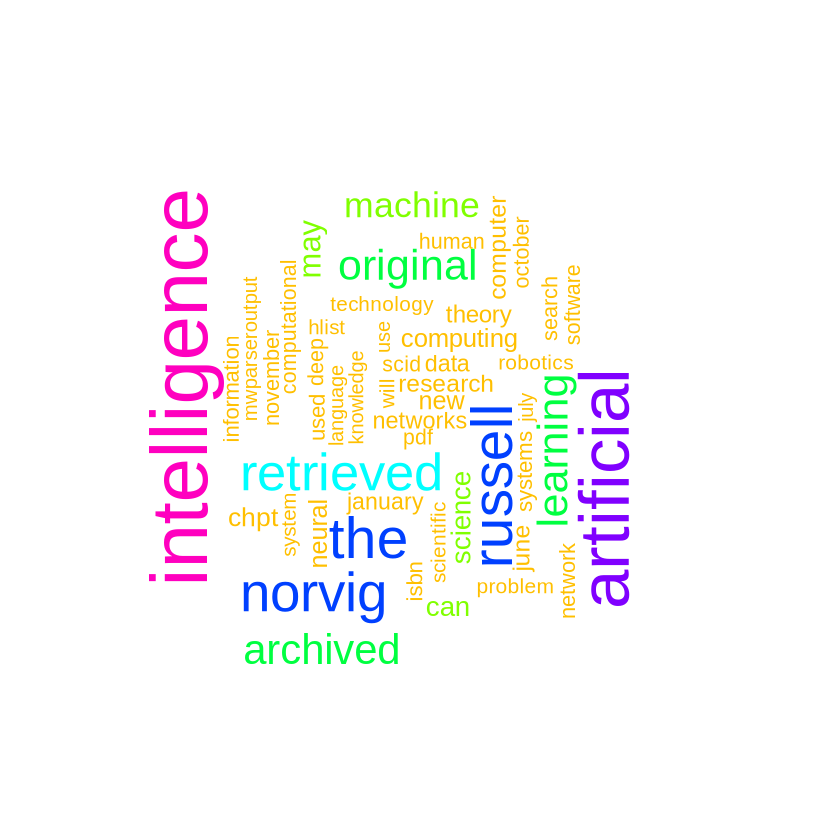

In [390]:
wordcloud(matriz$word, matriz$freq, max.words = 50, random.order = TRUE, colors = rainbow(8), rot.per = 0.5, use.r.layout = TRUE)
